In [1]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.45 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce GTX 1660 Ti, 6144MiB)
Setup complete ✅ (12 CPUs, 7.7 GB RAM, 111.5/1006.9 GB disk)


In [2]:
!nvidia-smi

Sun Jul  7 23:12:21 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 555.42.03              Driver Version: 555.85         CUDA Version: 12.5     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce GTX 1660 Ti     On  |   00000000:01:00.0  On |                  N/A |
| N/A   65C    P0             33W /   80W |    3369MiB /   6144MiB |      1%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## Importar Módulos

In [3]:
from utils import decide

### Path imagen de prueba

In [4]:
imgs_path='/home/SafeCross/results/to_prbe'

In [5]:
import json

def cargar_json_a_diccionario(ruta_archivo):
    try:
        with open(ruta_archivo, 'r') as archivo:
            datos = json.load(archivo)
        return datos
    except FileNotFoundError:
        print(f"No se encontró el archivo en la ruta '{ruta_archivo}'.")
        return None
    except json.JSONDecodeError:
        print("El archivo no contiene un JSON válido.")
        return None




# Load the json

In [6]:
data_json=cargar_json_a_diccionario('/home/SafeCross/results/datos.json')

In [7]:
len(data_json)

63

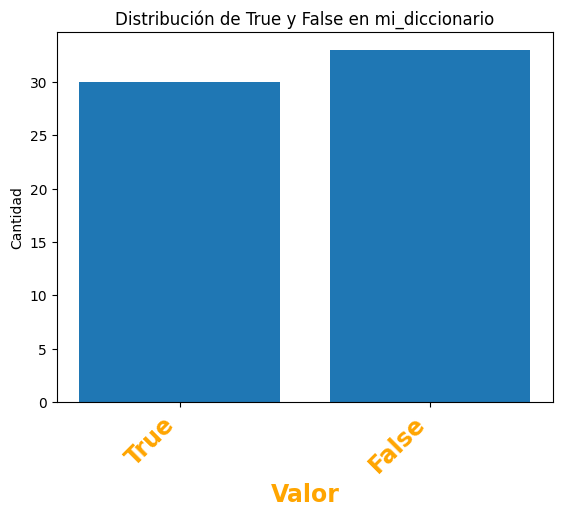

In [25]:
import matplotlib.pyplot as plt
from collections import Counter


# Contar las ocurrencias de True y False
conteo = Counter(data_json.values())

# Crear el gráfico de barras
plt.bar(conteo.keys(), conteo.values())
plt.xlabel('Valor', fontweight='bold', color='orange', fontsize='17', horizontalalignment='center')
plt.ylabel('Cantidad')
plt.title('Distribución de True y False en mi_diccionario')
plt.xticks(ticks=[0, 1], labels=['True', 'False'], color='orange', rotation=45, fontweight='bold', fontsize='17', horizontalalignment='right')
plt.show()

In [8]:
import os
import glob

def recopilar_fotografias(ruta_carpeta):
    # Patrón para encontrar archivos jpg, jpeg y png
    patrones = ['*.jpg', '*.jpeg', '*.png']
    
    # Lista para guardar las rutas absolutas de las fotografías
    rutas_fotografias = []
    
    # Recorrer cada patrón para encontrar archivos
    for patron in patrones:
        # Encuentra todos los archivos que coinciden con el patrón en la carpeta especificada
        archivos_encontrados = glob.glob(os.path.join(ruta_carpeta, patron))
        
        # Agrega las rutas absolutas a la lista
        rutas_fotografias.extend([os.path.abspath(archivo) for archivo in archivos_encontrados])
    
    return rutas_fotografias





In [9]:

fotografias = recopilar_fotografias(imgs_path)



In [10]:
len(fotografias)

64

In [11]:
def get_name(img_path:str)->str:
    indice = img_path.rfind('/')
    return img_path[indice+1:-4]

In [12]:
get_name(fotografias[0])

'11'

In [13]:
data=[]
y_true=[]
y_predict=[]

for img in fotografias:
   list_ok=[]
   false_posi=[]
   name=get_name(img)
   if not name in data_json:
      print(f'{name} no tiene label')
      continue
   real=data_json[name]
   y_true.append(real)
   predict= decide(img)
   y_predict.append(predict)
   data.append({'name':name,'real':real,'predict':predict})
   if real == predict:
      list_ok.append(name)
   
   if not real and predict:
      false_posi.append(name)
   
   


image 1/1 /home/SafeCross/results/to_prbe/11.jpg: 512x384 (no detections), 140.4ms
Speed: 4.7ms preprocess, 140.4ms inference, 718.9ms postprocess per image at shape (1, 3, 512, 384)

image 1/1 /home/SafeCross/results/to_prbe/28.jpg: 512x288 1 crosswalk, 265.3ms
Speed: 2.9ms preprocess, 265.3ms inference, 320.5ms postprocess per image at shape (1, 3, 512, 288)

image 1/1 /home/SafeCross/results/to_prbe/28.jpg: 640x384 1 verde, 204.9ms
Speed: 5.8ms preprocess, 204.9ms inference, 5.5ms postprocess per image at shape (1, 3, 640, 384)

image 1/1 /home/SafeCross/results/to_prbe/67.jpg: 512x288 1 crosswalk, 53.3ms
Speed: 3.1ms preprocess, 53.3ms inference, 4.0ms postprocess per image at shape (1, 3, 512, 288)

image 1/1 /home/SafeCross/results/to_prbe/67.jpg: 640x384 1 rojo, 34.3ms
Speed: 2.9ms preprocess, 34.3ms inference, 4.8ms postprocess per image at shape (1, 3, 640, 384)

image 1/1 /home/SafeCross/results/to_prbe/20.jpg: 512x352 (no detections), 155.8ms
Speed: 3.6ms preprocess, 155.8m

In [14]:
len(list_ok)

0

In [15]:
len(false_posi)

0

In [16]:
data

[{'name': '11', 'real': False, 'predict': False},
 {'name': '28', 'real': True, 'predict': True},
 {'name': '67', 'real': False, 'predict': False},
 {'name': '20', 'real': False, 'predict': False},
 {'name': '66', 'real': False, 'predict': False},
 {'name': '60', 'real': True, 'predict': False},
 {'name': '1', 'real': False, 'predict': False},
 {'name': '22', 'real': False, 'predict': False},
 {'name': '23', 'real': False, 'predict': False},
 {'name': '39', 'real': True, 'predict': True},
 {'name': '38', 'real': True, 'predict': True},
 {'name': '48', 'real': True, 'predict': False},
 {'name': '26', 'real': False, 'predict': False},
 {'name': '32', 'real': True, 'predict': True},
 {'name': '58', 'real': True, 'predict': False},
 {'name': '21', 'real': False, 'predict': False},
 {'name': '36', 'real': True, 'predict': True},
 {'name': '98', 'real': False, 'predict': False},
 {'name': '18', 'real': False, 'predict': False},
 {'name': '33', 'real': True, 'predict': True},
 {'name': '54', 

In [17]:
import pandas as pd

# Inicializar un DataFrame vacío con las columnas requeridas
df = pd.DataFrame(columns=['name', 'real', 'predict'])
# Convertir la lista de diccionarios en un DataFrame y luego concatenar
df = pd.concat([df, pd.DataFrame(data)], ignore_index=True)

print(df)


   name   real predict
0    11  False   False
1    28   True    True
2    67  False   False
3    20  False   False
4    66  False   False
..  ...    ...     ...
56   14  False   False
57   51   True   False
58   65  False   False
59   96  False   False
60   53   True   False

[61 rows x 3 columns]


In [18]:
# Guardar el DataFrame en un archivo CSV
df.to_csv('/home/SafeCross/results/results.csv', index=False)

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, precision_recall_curve, precision_score, recall_score, f1_score


Reporte de Clasificación:
              precision    recall  f1-score   support

       False       0.64      1.00      0.78        28
        True       1.00      0.52      0.68        33

    accuracy                           0.74        61
   macro avg       0.82      0.76      0.73        61
weighted avg       0.83      0.74      0.72        61

Matriz de Confusión:
[[28  0]
 [16 17]]
Exactitud: 0.7377049180327869


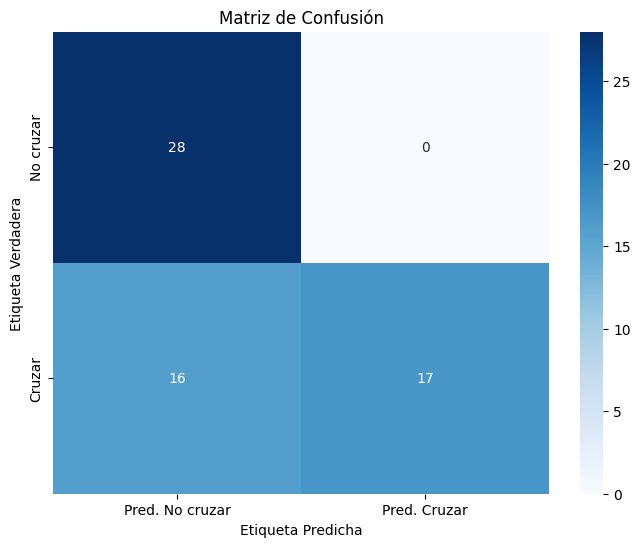

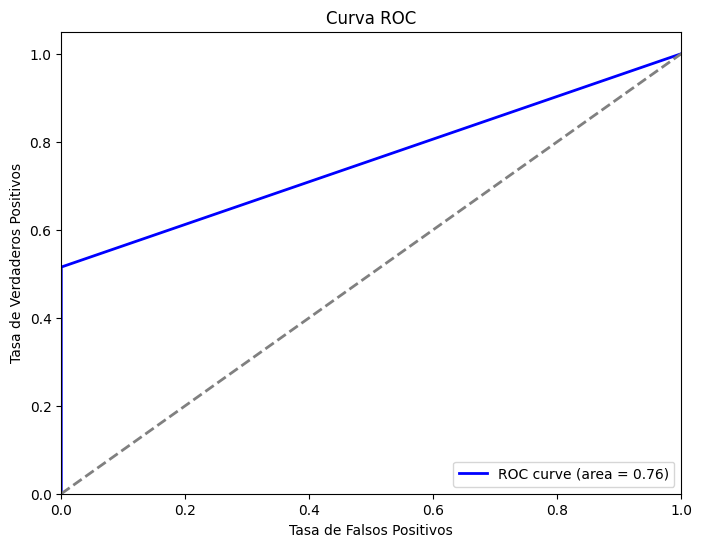

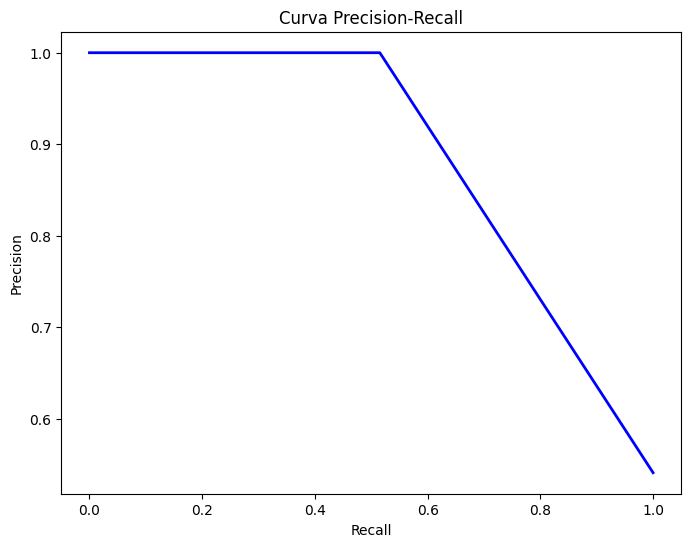

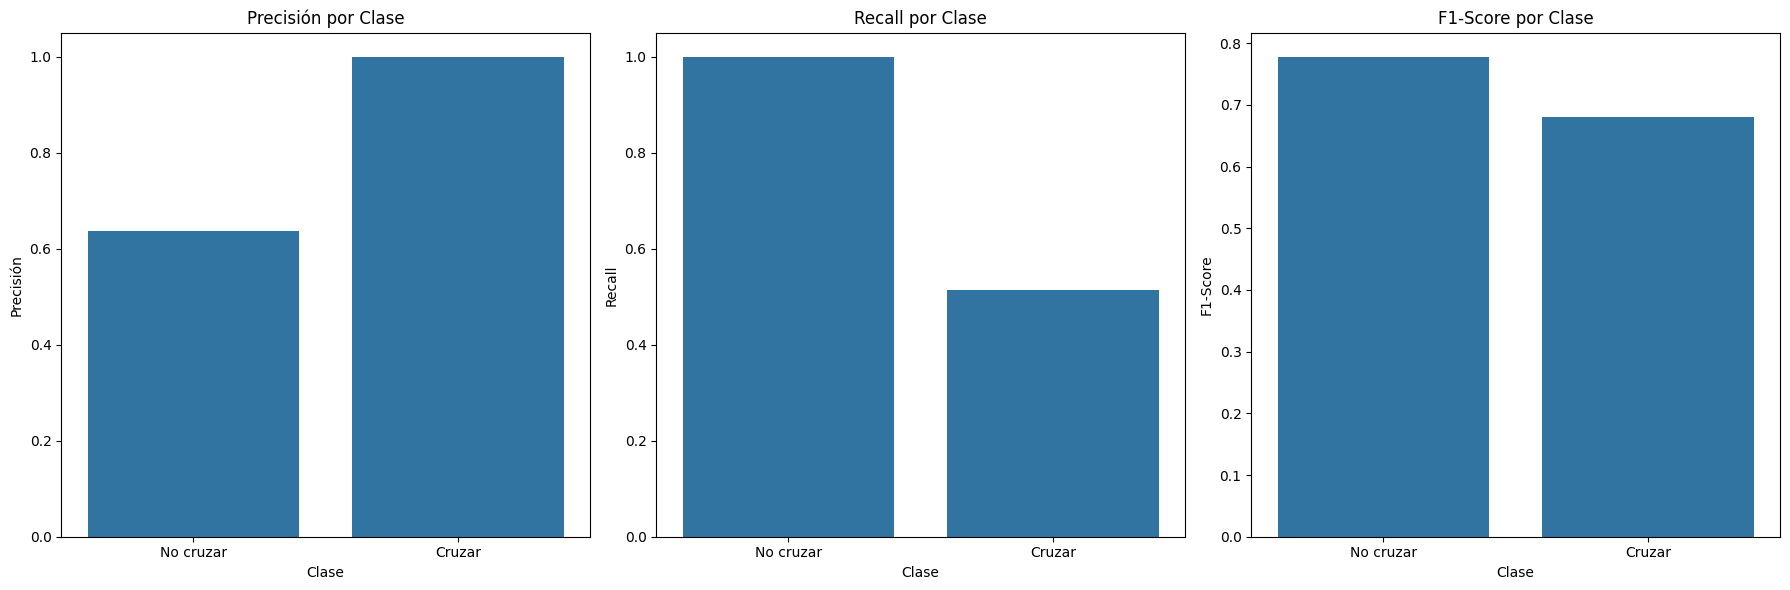

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, precision_recall_curve, precision_score, recall_score, f1_score

# Datos de ejemplo
y_true = y_true
y_pred = y_predict

# Estadísticas
print("Reporte de Clasificación:")
print(classification_report(y_true, y_pred))

print("Matriz de Confusión:")
cm = confusion_matrix(y_true, y_pred)
print(cm)

accuracy = accuracy_score(y_true, y_pred)
print(f"Exactitud: {accuracy}")

# Convertir matriz de confusión a un DataFrame para usar con seaborn
cm_df = pd.DataFrame(cm, index=['No cruzar', 'Cruzar'], columns=['Pred. No cruzar', 'Pred. Cruzar'])

# Graficar la Matriz de Confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.show()

# Curva ROC
fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

# Curva Precision-Recall
precision, recall, _ = precision_recall_curve(y_true, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall')
plt.show()

# Gráfico de Precisión por Clase
precision_no_cruzar = precision_score(y_true, y_pred, pos_label=0)
precision_cruzar = precision_score(y_true, y_pred, pos_label=1)
recall_no_cruzar = recall_score(y_true, y_pred, pos_label=0)
recall_cruzar = recall_score(y_true, y_pred, pos_label=1)
f1_no_cruzar = f1_score(y_true, y_pred, pos_label=0)
f1_cruzar = f1_score(y_true, y_pred, pos_label=1)

metrics = {
    'Clase': ['No cruzar', 'Cruzar'],
    'Precisión': [precision_no_cruzar, precision_cruzar],
    'Recall': [recall_no_cruzar, recall_cruzar],
    'F1-Score': [f1_no_cruzar, f1_cruzar]
}

metrics_df = pd.DataFrame(metrics)

# Graficar Precisión, Recall y F1-Score por Clase
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
sns.barplot(x='Clase', y='Precisión', data=metrics_df, ax=ax[0])
sns.barplot(x='Clase', y='Recall', data=metrics_df, ax=ax[1])
sns.barplot(x='Clase', y='F1-Score', data=metrics_df, ax=ax[2])

ax[0].set_title('Precisión por Clase')
ax[1].set_title('Recall por Clase')
ax[2].set_title('F1-Score por Clase')

plt.tight_layout()
plt.show()


In [21]:
metrics_df.to_csv('/home/SafeCross/results/metrics.csv',index=False)

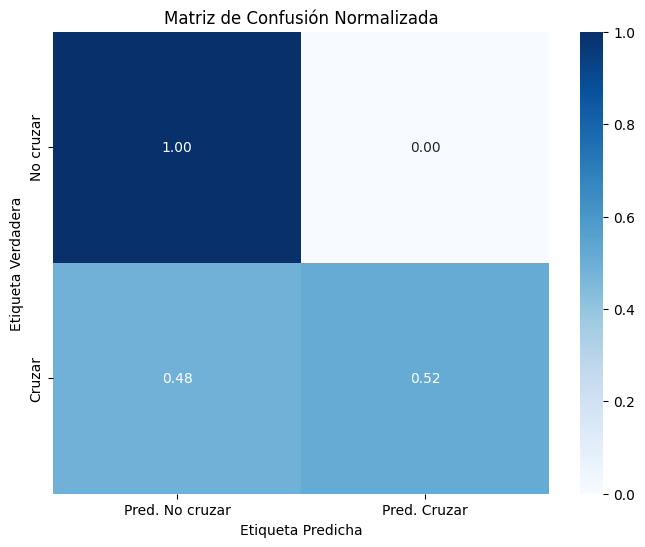

In [22]:
# Normalizar la matriz de confusión
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Convertir la matriz de confusión normalizada a un DataFrame para usar con seaborn
cm_normalized_df = pd.DataFrame(cm_normalized, index=['No cruzar', 'Cruzar'], columns=['Pred. No cruzar', 'Pred. Cruzar'])

# Graficar la Matriz de Confusión Normalizada
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized_df, annot=True, fmt='.2f', cmap='Blues')
plt.title('Matriz de Confusión Normalizada')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.show()


# Falsos Positivos

In [23]:
# Filtrar el DataFrame para encontrar nombres donde 'real' y 'predict' sean False
filtros = df[(df['real'] == False) & (df['predict'] == True)]

# Mostrar los resultados
print(filtros[['name']])

Empty DataFrame
Columns: [name]
Index: []
